In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv('/content/gender_submission.csv')

In [67]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


from matplotlib import pyplot as plt
_df_5['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('PassengerId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['PassengerId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'PassengerId'}, axis=1)
              .sort_values('PassengerId', ascending=True))
  xs = counted['PassengerId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('PassengerId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

In [68]:
df. columns. tolist()

['PassengerId', 'Survived']

In [69]:
print(df)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [70]:
df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


from matplotlib import pyplot as plt
_df_12['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [72]:
df.isna().sum()

,0
PassengerId,0
Survived,0


In [73]:
df.duplicated().sum()

np.int64(0)

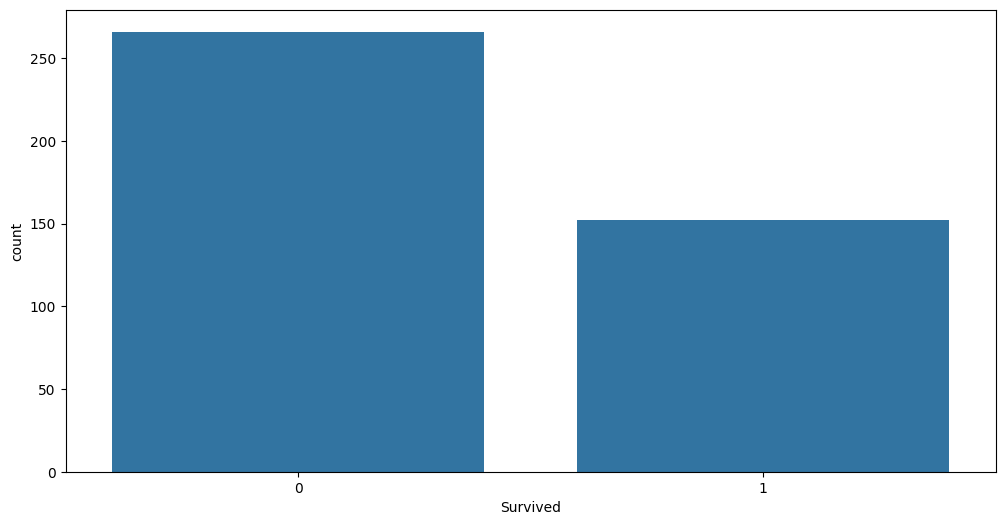

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(x='Survived',data=df)
plt.show()

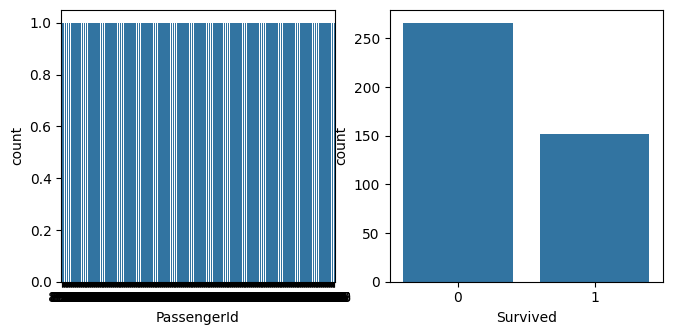

In [75]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['PassengerId', 'Survived']):
  plt.subplot(3,3,i+1)
  sns.countplot(x=col,data=df)
plt.show()

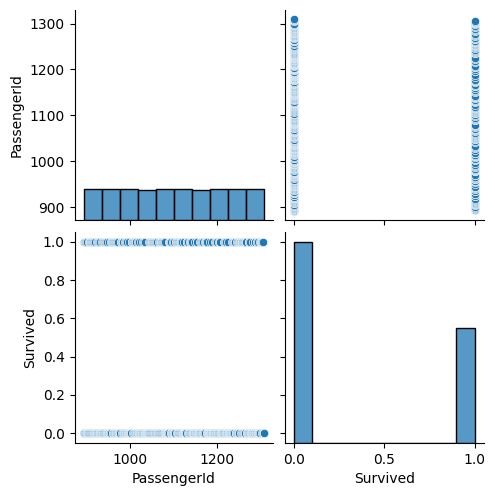

In [76]:
sns.pairplot(df)

<Axes: >

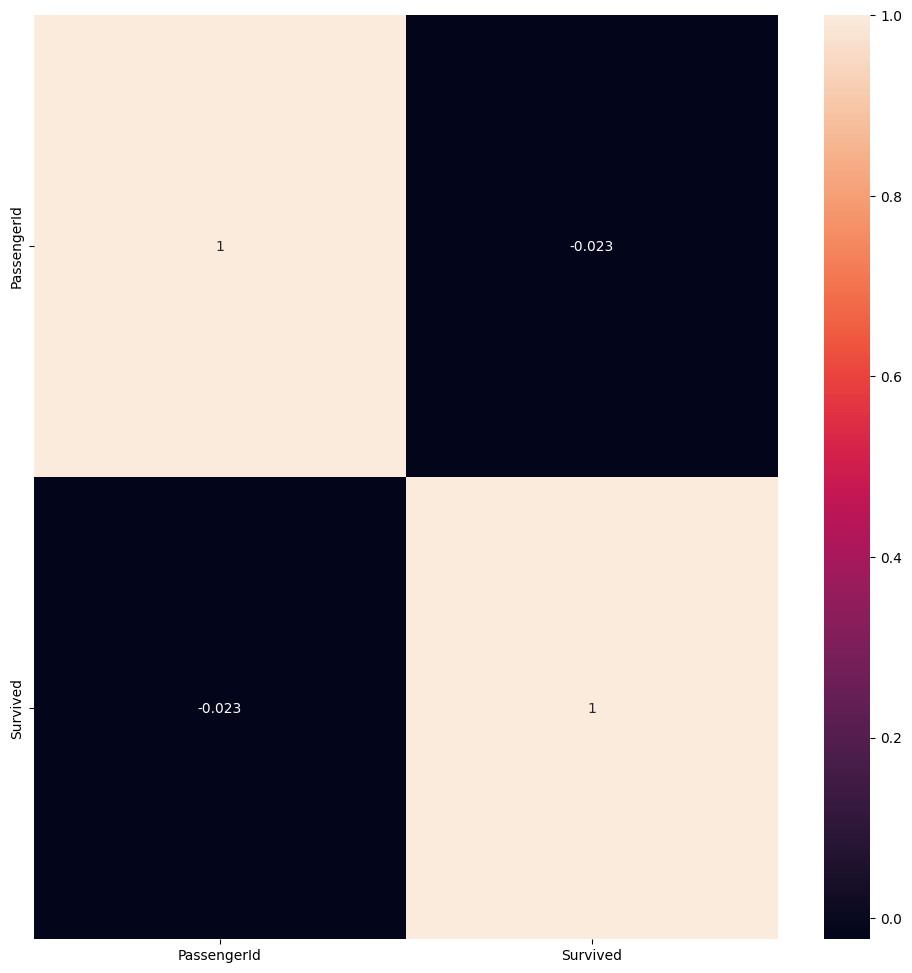

In [77]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Survived']=le.fit_transform(df['Survived'])

In [79]:
from sklearn.model_selection import train_test_split
x=df.drop('Survived',axis=1)
y=df['Survived']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
test_score=[]
train_score=[]
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  test_score.append(knn.score(x_test,y_test))
  train_score.append(knn.score(x_train,y_train))

In [82]:
max_train_score=max(train_score)
max_test_score=max(test_score)

In [83]:
train_score_index=index=[i for i,v in enumerate(train_score) if v==max_train_score]
test_score_index=index=[i for i,v in enumerate(test_score) if v==max_test_score]

In [84]:
max_test_score=max(test_score)
print("max train score{}%and k={}".format(max_train_score*100,train_score_index[0]+1))
print("max test score{}%and k={}".format(max_test_score*100,test_score_index[0]+1))

max train score100.0%and k=1
max test score63.095238095238095%and k=4


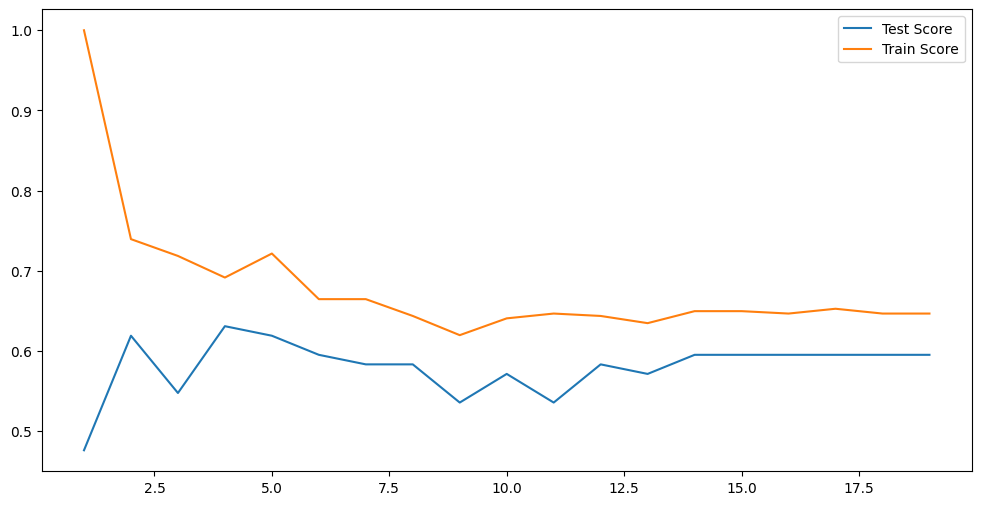

In [85]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20),test_score,label='Test Score')
plt.plot(range(1,20),train_score,label='Train Score')
plt.legend()

In [86]:
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)*100

59.523809523809526

In [87]:
import sklearn.metrics as metrics
y_pred=knn.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

print(metrics.classification_report(y_test,y_pred))

[[50  0]
 [34  0]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84



In [88]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84

